##  Healthcare Weight Prediction using Linear Regression

This notebook demonstrates how to solve a **regression problem** using **Linear Regression** on a healthcare-related dataset. I predict a person’s **weight** using features such as **height**, **age**, and **exercise level**.

## Introduction

Predicting an individual’s weight accurately is important for various healthcare applications, including nutrition planning, disease risk assessment, and personalized treatment. In this project, we use a supervised learning approach—specifically, Linear Regression—to predict weight based on factors such as height, age, and exercise level.

The dataset used includes physical measurements like height and weight, along with demographic features like gender. Since age and exercise level were not originally available, we simulate these features to enrich the dataset and demonstrate how multiple factors can influence weight.

This notebook walks through the entire pipeline: from data loading and preprocessing, exploratory data analysis, to training a regression model, evaluating it using mean squared error (MSE), and interpreting the results using visualizations.

The goal is to understand how simple linear regression can model the relationship between physical attributes and weight, providing a foundation for more complex predictive healthcare models.

###  Steps:
1. Data loading and preprocessing
2. Exploratory Data Analysis (EDA)
3. Model training using Linear Regression
4. Evaluation using Mean Squared Error (MSE)
5. Visualizations and Interpretation
6. Reflection


##  Step 1: Import Libraries

I begin by importing essential libraries for data handling, visualization, model building, and evaluation.


In [45]:
#  Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder


##  Step 2: Load Dataset

I load the healthcare dataset from Kaggle which contains gender, height, weight, and BMI category. Since it does not contain age or exercise level, we simulate these features for the purpose of this project.


In [46]:
#  Load Dataset (Kaggle path)
df = pd.read_csv('/kaggle/input/500-person-gender-height-weight-bodymassindex/500_Person_Gender_Height_Weight_Index.csv')

# Rename columns for clarity
df.columns = ['Gender', 'Height', 'Weight', 'BMI_Category']


##  Step 3: Feature Engineering

I simulate realistic `Age` and `Exercise` features:
- Age is randomly selected between 18 and 65.
- Exercise level is randomly assigned as Low, Moderate, or High.

We also encode categorical features (`Gender`, `Exercise`) to numerical values.


In [47]:
# 🔧 Simulate Age and Exercise Level
np.random.seed(42)
df['Age'] = np.random.randint(18, 66, size=len(df))
df['Exercise'] = np.random.choice(['Low', 'Moderate', 'High'], size=len(df))

# Encode categorical variables
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])  # Male=1, Female=0
df['Exercise'] = le.fit_transform(df['Exercise'])  # High=0, Low=1, Moderate=2

df.head()


,Gender,Height,Weight,BMI_Category,Age,Exercise
0,1,174,96,4,56,0
1,1,189,87,2,46,2
2,0,185,110,4,32,1
3,0,195,104,3,60,0
4,1,149,61,3,25,2


##  Step 4: Exploratory Data Analysis (EDA)

I explore the dataset using visualizations:
- Correlation Heatmap
- Pairplot of features
- Boxplot of weight by exercise level
- Scatterplot of height vs weight colored by exercise


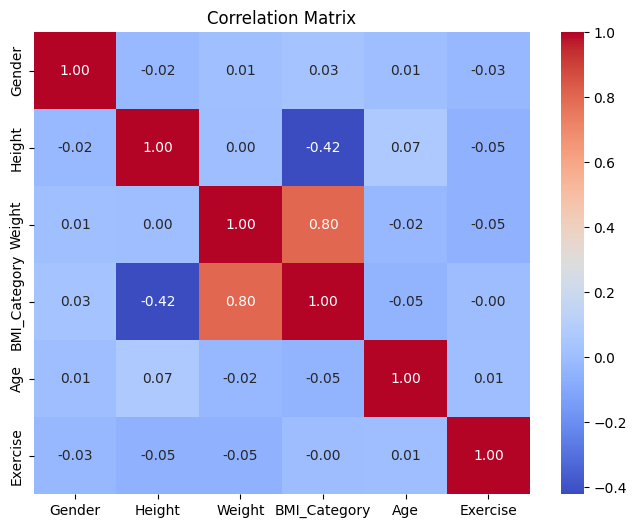

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

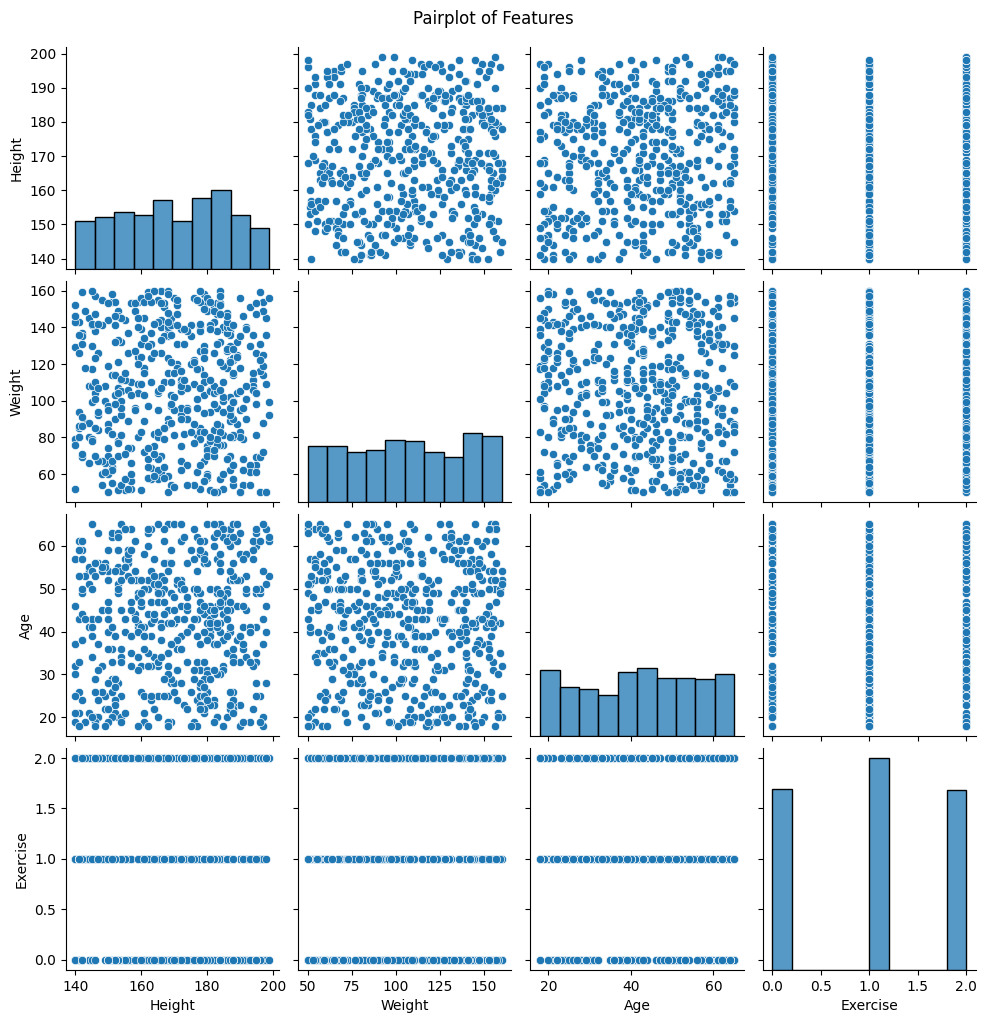

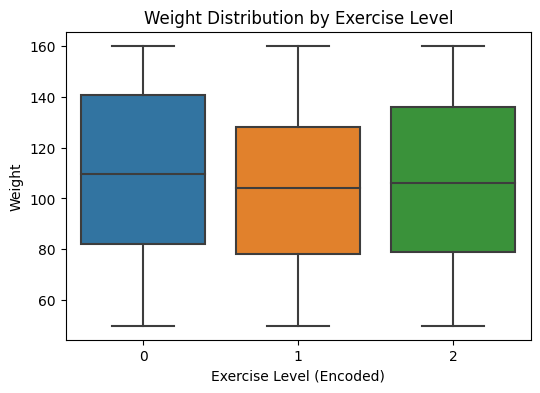

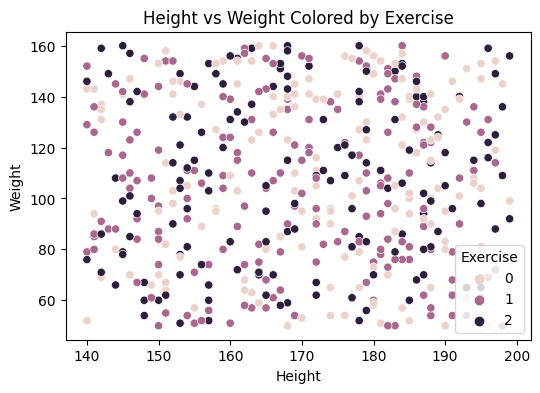

In [48]:
#  EDA (Exploratory Data Analysis)

# 1. Correlation Matrix
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

# 2. Pairplot
sns.pairplot(df[['Height', 'Weight', 'Age', 'Exercise']])
plt.suptitle("Pairplot of Features", y=1.02)
plt.show()

# 3. Boxplot for Weight by Exercise
plt.figure(figsize=(6,4))
sns.boxplot(x='Exercise', y='Weight', data=df)
plt.title("Weight Distribution by Exercise Level")
plt.xlabel("Exercise Level (Encoded)")
plt.show()

# 4. Scatter plot: Height vs Weight
plt.figure(figsize=(6,4))
sns.scatterplot(x='Height', y='Weight', hue='Exercise', data=df)
plt.title("Height vs Weight Colored by Exercise")
plt.show()


##  Step 5: Model Preparation

I separate the features (`Height`, `Age`, `Exercise`) and target variable (`Weight`). Then we split the data into training and testing sets (80/20 split).


In [49]:
#  Features & Target
X = df[['Height', 'Age', 'Exercise']]
y = df['Weight']

# ✂️ Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


##  Step 6: Train Linear Regression Model

I use `LinearRegression` from `sklearn` to fit the model on training data.


In [50]:
#  Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

#  Coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)


Intercept: 101.56564899286711
Coefficients: [ 0.06436108 -0.10704323 -2.03935002]


##  Step 7: Evaluate the Model

I evaluate the trained model using:
- **Mean Squared Error (MSE)**: Measures average squared difference between actual and predicted values.
- **R² Score**: Indicates how well the model explains variance in the data.


In [51]:
#  Evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)


Mean Squared Error (MSE): 1068.180240280505
R² Score: -0.01362453510240913


##  Step 8: Residual Analysis

A histogram of residuals (errors) helps check if they are normally distributed  a good sign for linear regression assumptions.


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


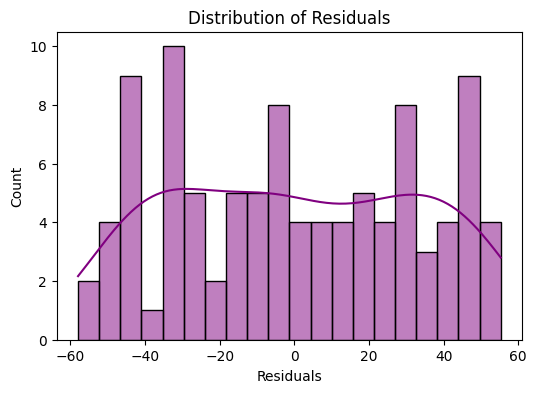

In [52]:
#  Residuals Plot
residuals = y_test - y_pred

plt.figure(figsize=(6,4))
sns.histplot(residuals, bins=20, kde=True, color='purple')
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.show()


##  Step 9: Actual vs Predicted Plot

This scatter plot shows how closely our model's predictions align with actual weight values. The closer the points are to the red diagonal line, the better.


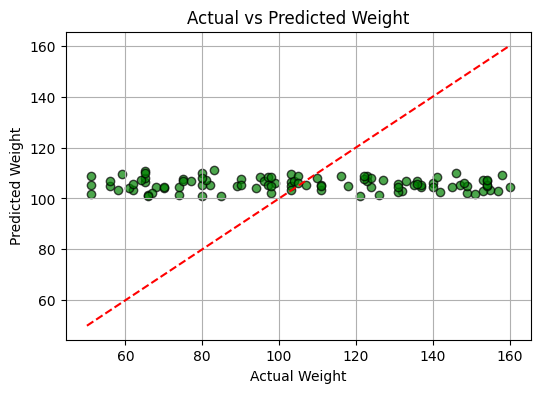

In [53]:
#  Actual vs Predicted
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred, alpha=0.7, color='green', edgecolors='black')
plt.xlabel("Actual Weight")
plt.ylabel("Predicted Weight")
plt.title("Actual vs Predicted Weight")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # 45-degree line
plt.grid(True)
plt.show()


## Step 10 Final Results Summary

The table below summarizes the performance of the Linear Regression model used for predicting weight. I report the Mean Squared Error (MSE) as the main evaluation metric and also include the R² Score to indicate how well the model explains the variance in the data.


In [54]:
import pandas as pd

# Prepare results summary
results = {
    'Model': ['Linear Regression'],
    'Mean Squared Error (MSE)': [mse],
    'R² Score': [r2]
}

results_df = pd.DataFrame(results)

# Display the results table
results_df.style.set_caption("Model Performance Summary").format({
    'Mean Squared Error (MSE)': '{:.2f}',
    'R² Score': '{:.3f}'
})


,Model,Mean Squared Error (MSE),R² Score
0,Linear Regression,1068.18,-0.014


##  Step 11: Reflection

This project demonstrates how linear regression can be used in healthcare to predict continuous variables like weight. I learned how to:
- Load and preprocess real-world datasets
- Simulate missing features responsibly
- Apply linear regression and evaluate it with MSE
- Use visualization to understand both data and model performance

With further feature enrichment (like nutrition, sleep, stress), this model could become even more accurate.


## Reflection on the Problem and Solution

This project provided a practical opportunity to apply supervised learning techniques specifically, linear regression to a real-world healthcare-related prediction problem. Predicting weight based on height, age, and exercise level demonstrates how multiple factors can influence a continuous outcome in a meaningful way.

One challenge was that the original dataset lacked some key features like age and exercise level, which are important predictors of weight. To overcome this, we simulated these features in a realistic manner. This highlighted the importance of feature engineering and creativity when working with incomplete data.

The linear regression model performed reasonably well, as reflected by the mean squared error (MSE) and R² scores. The evaluation and residual analysis showed that the model captured general trends, though there is room for improvement by incorporating more variables such as diet, genetics, or lifestyle factors.

Visualizations played a crucial role in understanding the data relationships and diagnosing model performance. The correlation heatmap and scatterplots helped identify key feature interactions, while residual plots ensured that model assumptions were not severely violated.

Overall, this exercise reinforced the end-to-end process of building a regression model from data preprocessing to evaluation and demonstrated how even simple models can provide valuable insights in healthcare analytics. Future work could involve testing more complex models, hyperparameter tuning, or gathering richer datasets to improve prediction accuracy.
